In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import sklearn as sk

In [2]:
df = pd.read_csv('Job_Placement_Data.csv')

# EDA

## Analysis of the data

**Identification of the target data**

In [3]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

The target data is the column `status`. This is the column that the model will try to predict.

**Number of rows and columns**

In [4]:
df.columns.value_counts().sum()

13

In [5]:
df.count()[0]

215

There are 13 columns and 215 rows.

**Types of variables**

In [6]:
df.dtypes.value_counts()

object     8
float64    5
dtype: int64

There are 2 types of variables: `float64` and `object`.

8 variables are `object` and 5 are `float64`.

**Missing values**

In [7]:
df.isna().sum().sum()

0

There are no missing values in the dataset

**Target visualization**

The target data is a binary variable. It can be one of these values:

* `Placed`: It means that the candidate is placed in the company

* `Not Placed`: It means that the candidate is not placed in the company

<AxesSubplot:ylabel='status'>

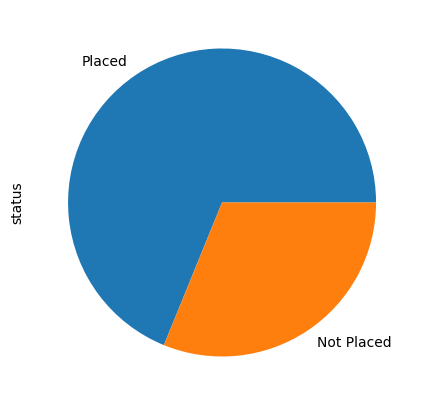

In [8]:
df['status'].value_counts().plot(kind='pie', figsize=(5, 5))

The dataset is unbalanced. There are 148 candidates placed and 67 candidates not placed. We can balance the dataset by removing some rows of the `Placed` category, but it will reduce the number of data and we have a small dataset.

In [9]:
df = df.sample(frac=1,random_state=42)

placed_df = df.loc[df['status'] == "Placed"][:67]
non_placed_df = df.loc[df['status'] == "Not Placed"]

normal_distributed_df = pd.concat([placed_df, non_placed_df])

df_balanced = normal_distributed_df.sample(frac=1,random_state=42)

<AxesSubplot:ylabel='status'>

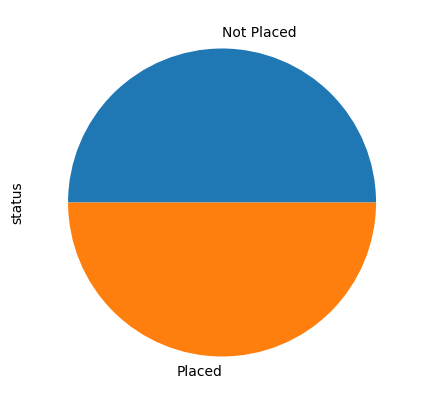

In [10]:
df_balanced['status'].value_counts().plot(kind='pie', figsize=(5, 5))

During the training of the model, we will train the models with the unbalanced dataset and the balanced dataset

**Understanding the input data**

As we saw earlier, there are 12 input variables, the variables are:

* `gender`: The gender of the candidate
* `ssc_percentage`: The senior secondary exams percentage (10th Grade)
* `ssc_board` : The board of education for ssc exams
* `hsc_percentage` : The higher secondary exams percentage (12th Grade)
* `hsc_borad` : The board of education for hsc exams
* `hsc_subject` : The subject of study for hsc
* `degree_percentage` : The percentage of marks in undergrad degree
* `undergrad_degree` : Undergrad degree majors
* `work_experience` : If the candidate has a past work experience
* `emp_test_percentage` : The aptitude test percentage
* `specialization` : Postgrad degree majors - (MBA specialization)
* `mba_percent` : Percentage of marks in MBA degree

**Gender**

<AxesSubplot:ylabel='gender'>

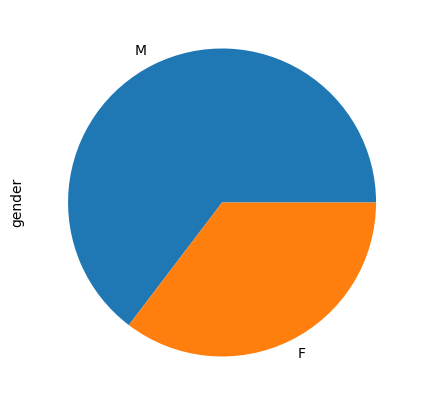

In [11]:
df["gender"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='gender'>

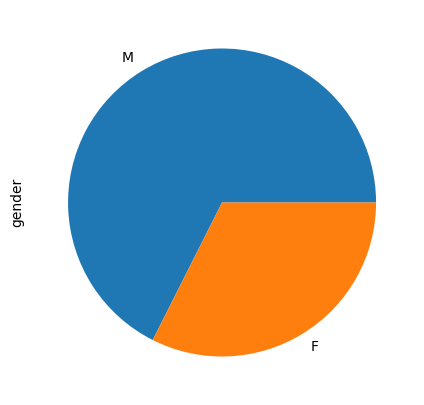

In [12]:
df[df["status"]=="Placed"]["gender"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='gender'>

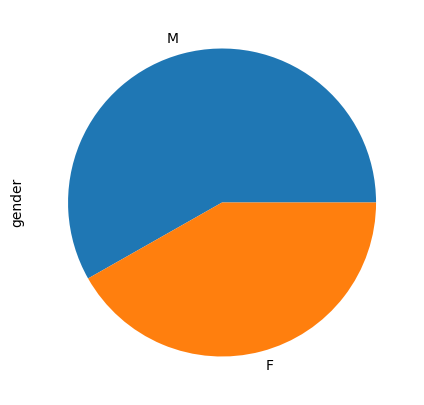

In [13]:
df[df["status"]=="Not Placed"]["gender"].value_counts().plot(kind='pie', figsize=(5, 5))

**ssc_percentage**

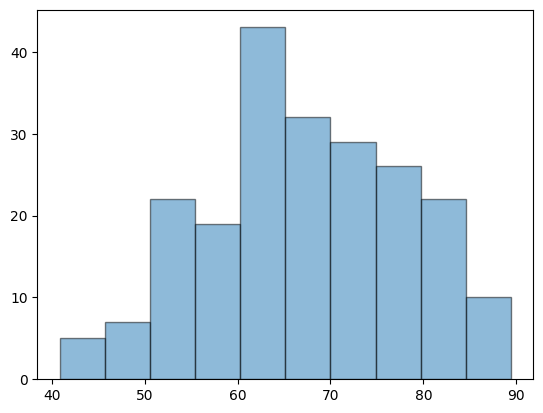

In [14]:
plt.hist(df['ssc_percentage'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

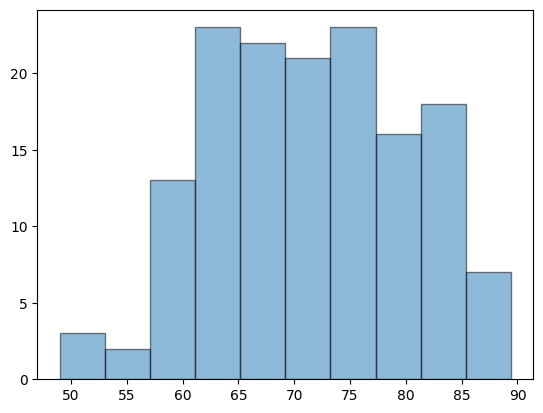

In [15]:
plt.hist(df[df["status"]=="Placed"]['ssc_percentage'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

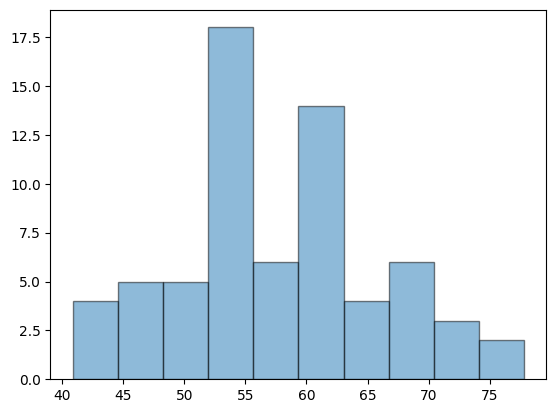

In [16]:
plt.hist(df[df["status"]=="Not Placed"]['ssc_percentage'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

There seems to be a difference in the percentage of marks between the `Placed` and `Not Placed` candidates. We can verify that by comparing the mean of the two groups. 

In [17]:
print("Mean percentage of Placed class:",df[df["status"]=="Placed"]["ssc_percentage"].mean())
print("Mean percentage of Not Placed class:",df[df["status"]=="Not Placed"]["ssc_percentage"].mean())

Mean percentage of Placed class: 71.72148648648648
Mean percentage of Not Placed class: 57.54402985074626


A statistical test will be performed later to confirm this hypothesis

**ssc_board**

In [18]:
df["ssc_board"].nunique()

2

<AxesSubplot:ylabel='ssc_board'>

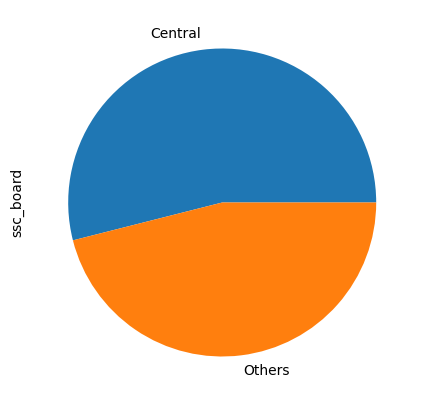

In [19]:
df["ssc_board"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='ssc_board'>

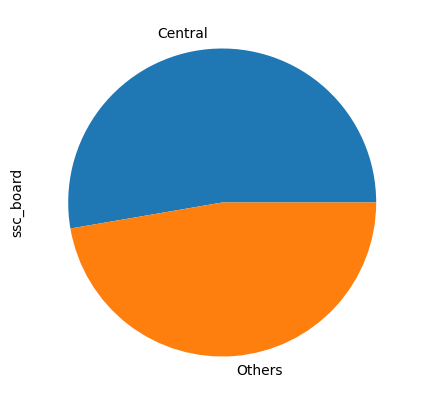

In [22]:
df[df["status"]=="Placed"]["ssc_board"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='ssc_board'>

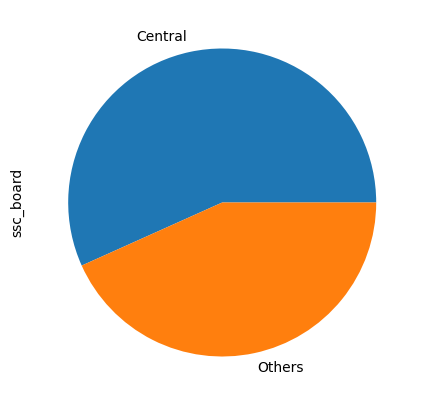

In [23]:
df[df["status"]=="Not Placed"]["ssc_board"].value_counts().plot(kind='pie', figsize=(5, 5))

For this class, there isn't a significant difference between the `Placed` and `Not Placed` candidates.

**`hsc_percentage`**

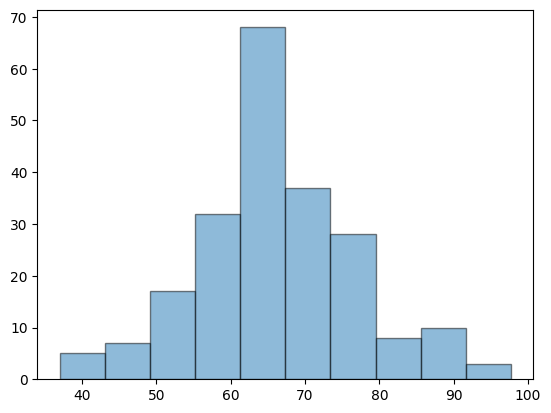

In [24]:
plt.hist(df['hsc_percentage'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

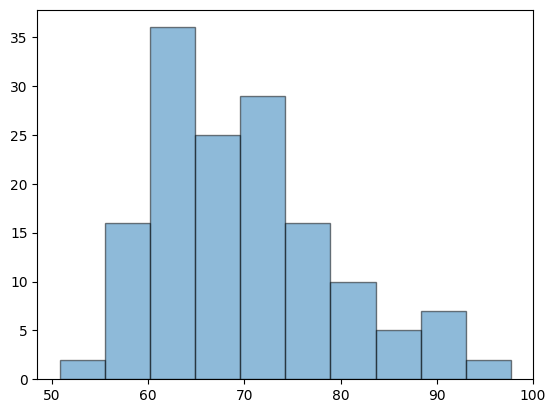

In [25]:
plt.hist(df[df["status"]=="Placed"]['hsc_percentage'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

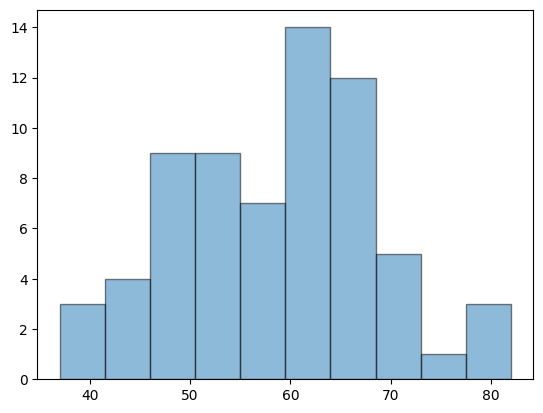

In [26]:
plt.hist(df[df["status"]=="Not Placed"]['hsc_percentage'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

Like the `ssc_percentage`, there seems to be a difference in the percentage of marks between the `Placed` and `Not Placed` candidates. We can verify that by comparing the mean of the two groups.

In [27]:
print("Mean percentage of Placed class:",df[df["status"]=="Placed"]["hsc_percentage"].mean())
print("Mean percentage of Not Placed class:",df[df["status"]=="Not Placed"]["hsc_percentage"].mean())

Mean percentage of Placed class: 69.92655405405404
Mean percentage of Not Placed class: 58.3955223880597


A statistical test will also be performed later to confirm this hypothesis

**`hsc_board`**

<AxesSubplot:ylabel='hsc_board'>

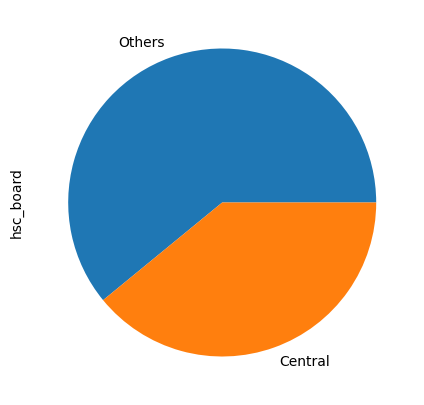

In [28]:
df["hsc_board"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='hsc_board'>

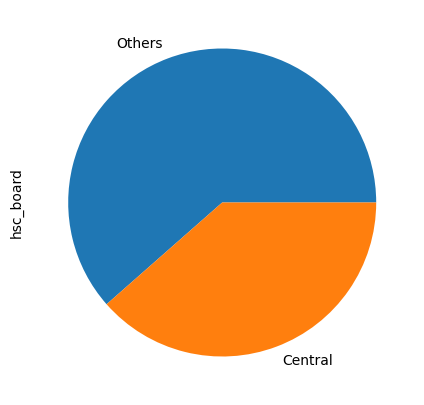

In [29]:
df[df["status"]=="Placed"]["hsc_board"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='hsc_board'>

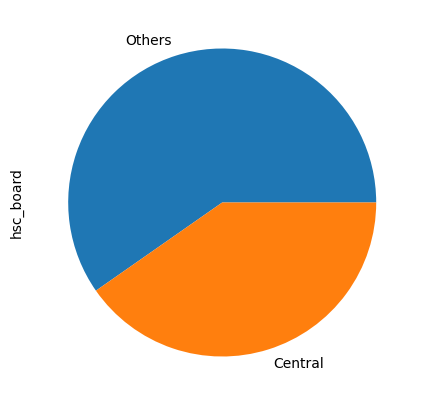

In [30]:
df[df["status"]=="Not Placed"]["hsc_board"].value_counts().plot(kind='pie', figsize=(5, 5))

**`hsc_subject`**

<AxesSubplot:ylabel='hsc_subject'>

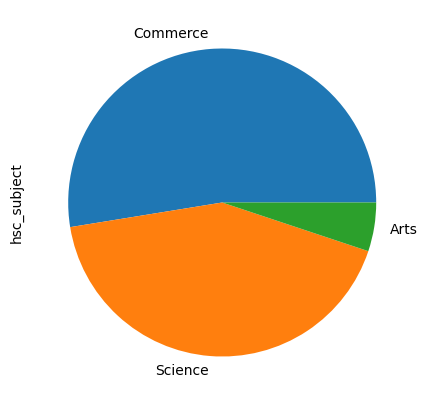

In [31]:
df["hsc_subject"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='hsc_subject'>

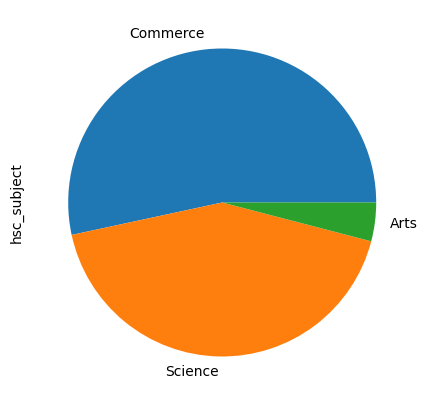

In [32]:
df[df["status"]=="Placed"]["hsc_subject"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='hsc_subject'>

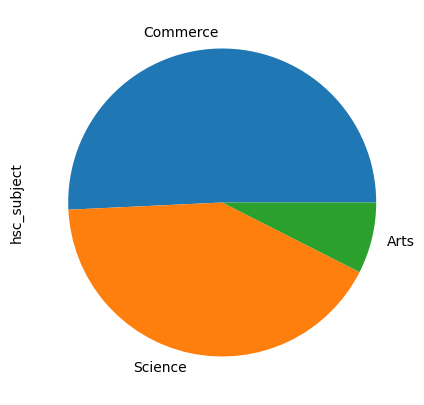

In [33]:
df[df["status"]=="Not Placed"]["hsc_subject"].value_counts().plot(kind='pie', figsize=(5, 5))

There doesn't seem to be a significant difference between the `Placed` and `Not Placed` candidates. We can just notice a slight difference in the `Arts category`, more `Not Placed` candidates have studied `Arts` than `Placed` candidates.

**`degree_percentage`**

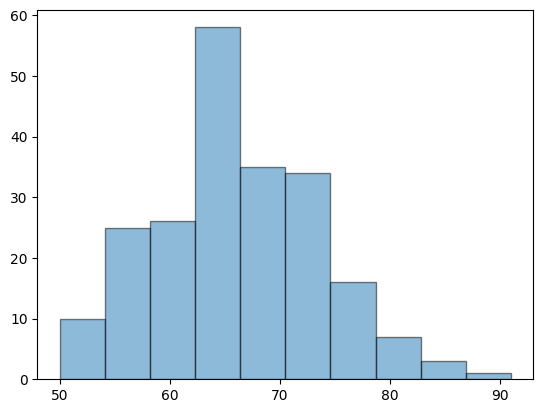

In [34]:
plt.hist(df['degree_percentage'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

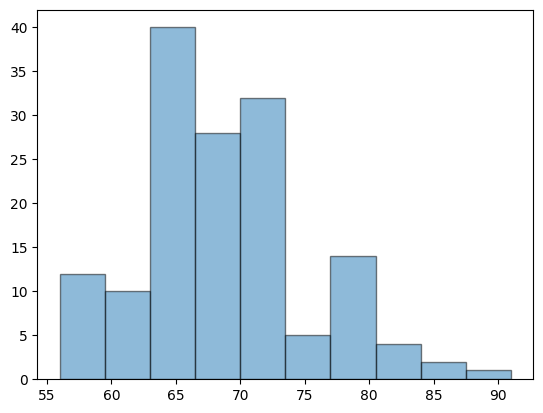

In [35]:
plt.hist(df[df["status"]=="Placed"]['degree_percentage'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

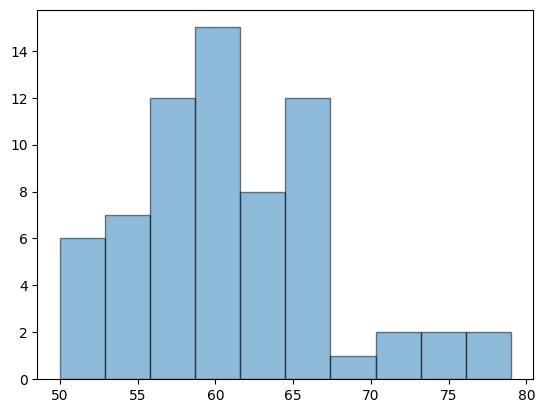

In [36]:
plt.hist(df[df["status"]=="Not Placed"]['degree_percentage'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

There seems to be a difference in the percentage of marks between the `Placed` and `Not Placed` candidates. We can verify that by comparing the mean of the two groups.

In [37]:
print("Mean percentage of Placed class:",df[df["status"]=="Placed"]["degree_percentage"].mean())
print("Mean percentage of Not Placed class:",df[df["status"]=="Not Placed"]["degree_percentage"].mean())

Mean percentage of Placed class: 68.74054054054054
Mean percentage of Not Placed class: 61.13417910447761


We will also perform a statistical test later to confirm this hypothesis

**`undergrad_degree`**

<AxesSubplot:ylabel='undergrad_degree'>

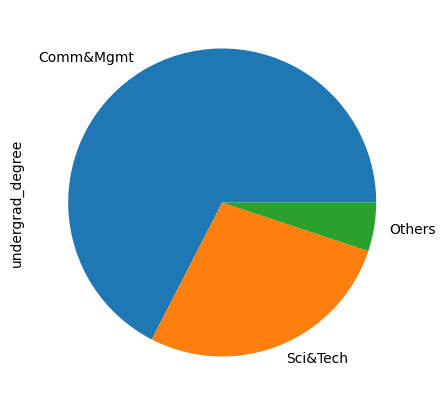

In [38]:
df["undergrad_degree"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='undergrad_degree'>

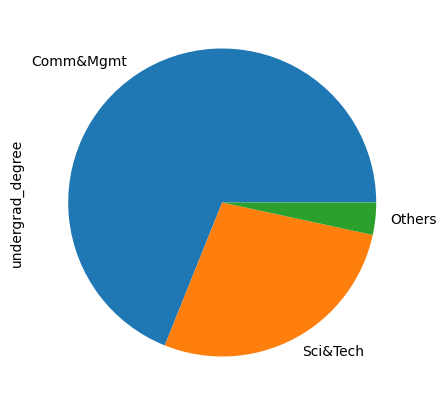

In [39]:
df[df["status"]=="Placed"]["undergrad_degree"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='undergrad_degree'>

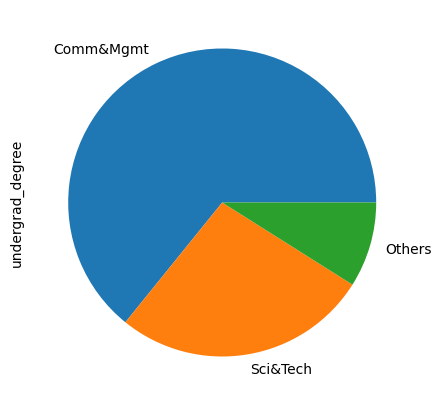

In [40]:
df[df["status"]=="Not Placed"]["undergrad_degree"].value_counts().plot(kind='pie', figsize=(5, 5))

Like for the `hsc_subject`, there doesn't seem to be a significant difference between the `Placed` and `Not Placed` candidates. We can just notice a slight difference in the `Others` category, more `Not Placed` candidates are in the category `Others` than `Placed` candidates.

**`work_experience`**

<AxesSubplot:ylabel='work_experience'>

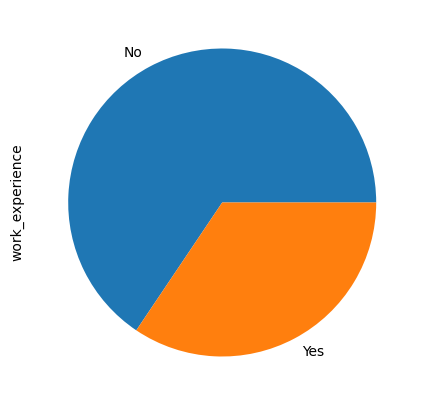

In [41]:
df["work_experience"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='work_experience'>

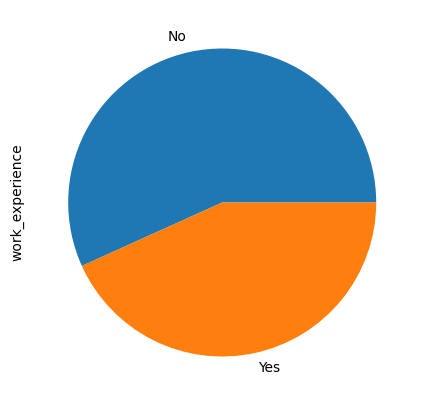

In [42]:
df[df["status"]=="Placed"]["work_experience"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='work_experience'>

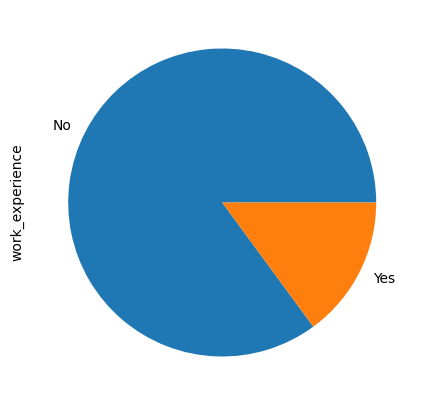

In [43]:
df[df["status"]=="Not Placed"]["work_experience"].value_counts().plot(kind='pie', figsize=(5, 5))

There seems to be a significant difference between the `Placed` and `Not Placed` candidates. More `Placed` candidates have work experience than `Not Placed` candidates.

We will also perform a statistical test later to confirm this hypothesis

**`emp_test_percentage`**

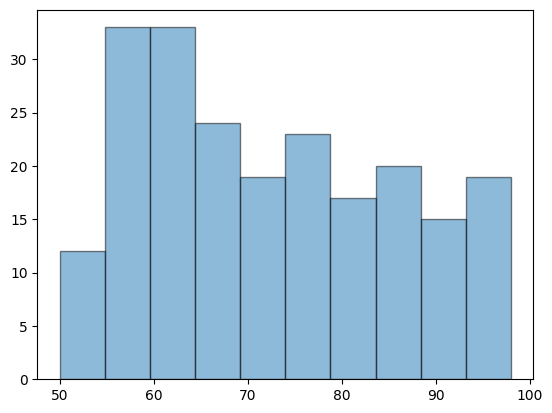

In [44]:
plt.hist(df['emp_test_percentage'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

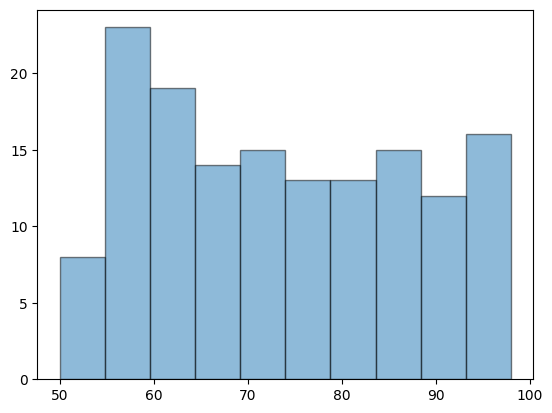

In [45]:
plt.hist(df[df["status"]=="Placed"]['emp_test_percentage'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

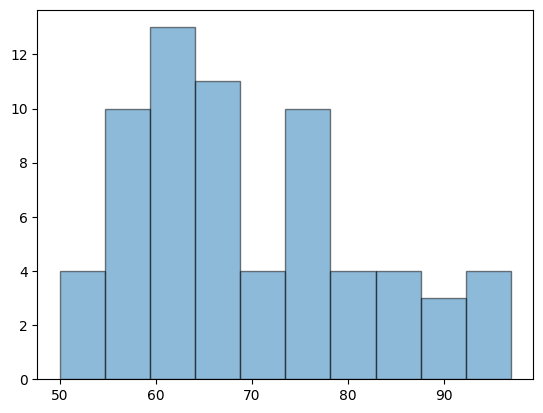

In [46]:
plt.hist(df[df["status"]=="Not Placed"]['emp_test_percentage'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

There seems to be a difference in the percentage of marks between the `Placed` and `Not Placed` candidates. We can verify that by comparing the mean of the two groups.

In [47]:
print("Mean percentage of Placed class:",df[df["status"]=="Placed"]["emp_test_percentage"].mean())
print("Mean percentage of Not Placed class:",df[df["status"]=="Not Placed"]["emp_test_percentage"].mean())

Mean percentage of Placed class: 73.23804054054054
Mean percentage of Not Placed class: 69.58791044776119


We will perform a statistical test later to confirm this hypothesis

**`specialisation`**

<AxesSubplot:ylabel='specialisation'>

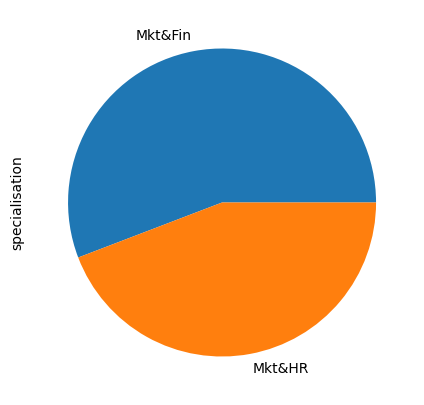

In [49]:
df["specialisation"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='specialisation'>

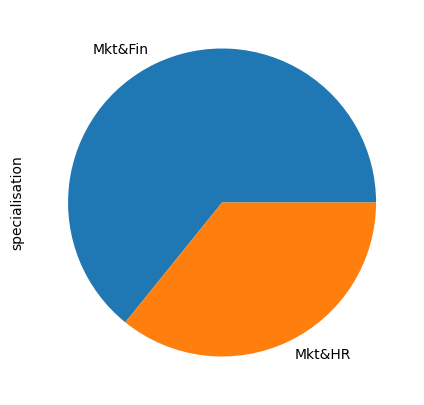

In [50]:
df[df["status"]=="Placed"]["specialisation"].value_counts().plot(kind='pie', figsize=(5, 5))

<AxesSubplot:ylabel='specialisation'>

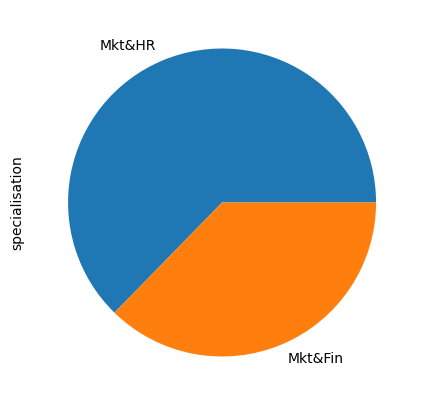

In [51]:
df[df["status"]=="Not Placed"]["specialisation"].value_counts().plot(kind='pie', figsize=(5, 5))

We can see a huge difference between the `Placed` and `Not Placed` candidates. More `Placed` candidates have a `Mkt&Fin` specialization than `Not Placed` candidates.

We will confirm that with a statistical test later

**`mba_percent`**

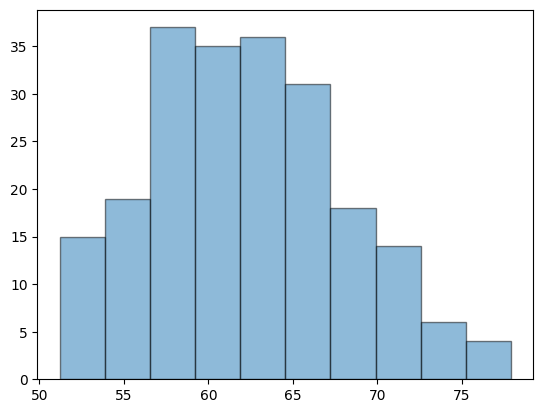

In [52]:
plt.hist(df['mba_percent'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

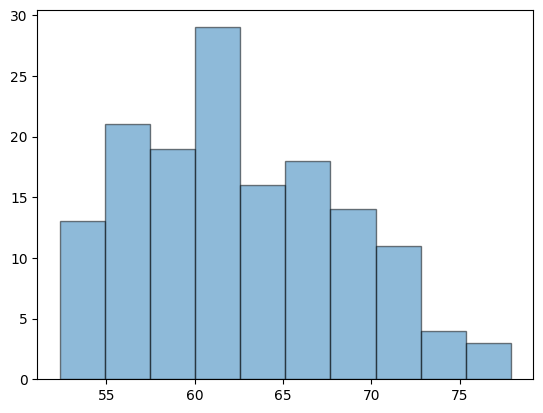

In [53]:
plt.hist(df[df["status"]=="Placed"]['mba_percent'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

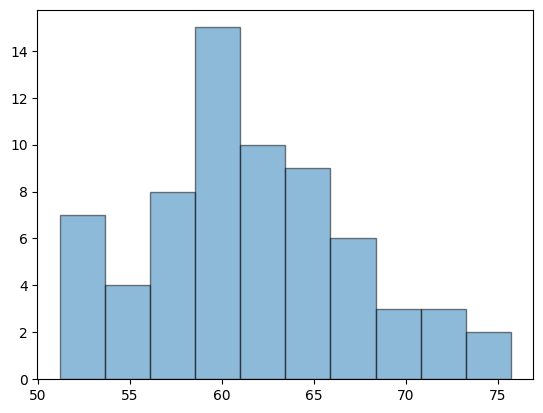

In [54]:
plt.hist(df[df["status"]=="Not Placed"]['mba_percent'], bins=10, alpha=0.5,edgecolor='black', label='SSC Percentage');

We can see a slight difference on the left tail of the distribution. More `Not Placed` candidates have a lower percentage of marks than `Placed` candidates. We will compare the mean of the two groups and perform a statistical test later to confirm this hypothesis

In [55]:
print("Mean percentage of Placed class:",df[df["status"]=="Placed"]["mba_percent"].mean())
print("Mean percentage of Not Placed class:",df[df["status"]=="Not Placed"]["mba_percent"].mean())

Mean percentage of Placed class: 62.579391891891895
Mean percentage of Not Placed class: 61.612835820895526


## Statistical tests

Let's formulate our hypothesis:

* `H0`: There is no difference between the `Placed` and `Not Placed` candidates

* `H1`: There is a difference between the `Placed` and `Not Placed` candidates

To verify the hypothesis, we will perform a student test. We will use the `ttest_ind` function from the `scipy.stats` module

In [73]:
def t_test(category,df):
    alpha = 0.05
    df1 = df[df["status"]=="Placed"][category]
    df2 = df[df["status"]=="Not Placed"][category]
    stat,p = sp.stats.ttest_ind(df1,df2)
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [74]:
cols = ['ssc_percentage', 'hsc_percentage', 'degree_percentage', 'emp_test_percentage', 'mba_percent']
for col in cols:
    print(col)
    t_test(col,df)

ssc_percentage
Different distributions (reject H0)
hsc_percentage
Different distributions (reject H0)
degree_percentage
Different distributions (reject H0)
emp_test_percentage
Same distributions (fail to reject H0)
mba_percent
Same distributions (fail to reject H0)


The tests confirmed that there is a significant difference between the `Placed` and `Not Placed` candidates for the following variables:

* `ssc_percentage`
* `hsc_percentage`
* `degree_percentage`

In [75]:
df_test_category = df["gender"]
df_test_category = pd.concat([df_test_category, df["status"]], axis=1)
# Change the value, "M" becomes 1 and "F" becomes 0
df_test_category["gender"] = df_test_category["gender"].map({"M":1, "F":0})
df_test_category = pd.concat([df_test_category, df["work_experience"]], axis=1)
df_test_category["work_experience"] = df_test_category["work_experience"].map({"Yes":1, "No":0})
df_test_category.head()

,gender,status,work_experience
200,1,Placed,0
212,1,Placed,1
138,0,Placed,1
176,0,Placed,0
15,0,Placed,1


In [76]:
cols = ["gender","work_experience"]
for col in cols:
    print(col)
    t_test(col,df_test_category)

gender
Same distributions (fail to reject H0)
work_experience
Different distributions (reject H0)


The test also confirmed that there is no significant difference between the `Placed` and `Not Placed` candidates for the following variables:
* `emp_test_percentage`
* `mba_percent`
* `gender`

Finally, the test confirmed that there is a significant difference between the `Placed` and `Not Placed` candidates for the variable `work_experience`

## Correlation matrix
The last step of the EDA is to check the correlation between the variables. We will use the `corr` method from the `pandas` module to calculate the correlation matrix.

/tmp/ipykernel_9161/3137218294.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_corr.corr(), annot=True, fmt=".2f")


<AxesSubplot:>

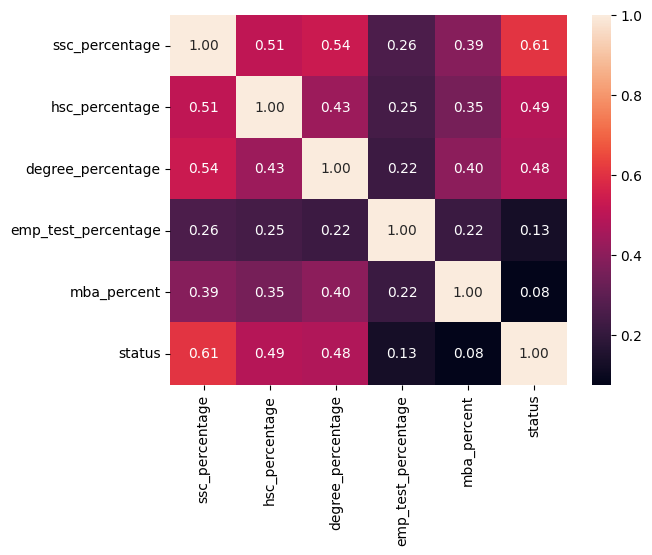

In [82]:
df_corr = df.copy()
df_corr["status"] = df_corr["status"].map({"Placed":1, "Not Placed":0})
sns.heatmap(df_corr.corr(), annot=True, fmt=".2f")

The most correlated variable with the target variable is `ssc_percentage` with a correlation of 0.607889. The least correlated variable with the target variable is `mba_percent` with a correlation of 0.076922.

## Conclusion of the EDA

The EDA allowed us to identify the target data and the input data. It showed us an imbalance in the target data. We also identified the variables that have a significant difference between the `Placed` and `Not Placed` candidates. We will use this information to build our model

# Model training

## Data preprocessing

Before training the model, we need to preprocess the data. We will perform the following steps:

* Convert the categorical variables to numerical variables
* Split the data into training and testing sets
* Scale the data

In [83]:
df["gender"] = df["gender"].map({"M":1, "F":0})
df["work_experience"] = df["work_experience"].map({"Yes":1, "No":0})
df["status"] = df["status"].map({"Placed":1, "Not Placed":0})
df = pd.get_dummies(df, columns=["ssc_board", "hsc_board", "hsc_subject", "undergrad_degree", "specialisation"], drop_first=True)

df.head()

,gender,ssc_percentage,hsc_percentage,degree_percentage,work_experience,emp_test_percentage,mba_percent,status,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,specialisation_Mkt&HR
200,1,69.0,60.0,65.0,0,87.55,52.81,1,1,1,1,0,0,0,0
212,1,67.0,67.0,73.0,1,59.00,69.72,1,1,1,1,0,0,0,0
138,0,82.0,64.0,73.0,1,96.00,71.77,1,1,1,0,1,0,1,0
176,0,59.0,60.0,56.0,0,55.00,57.90,1,0,1,1,0,0,0,1
15,0,65.0,75.0,69.0,1,72.00,64.66,1,0,0,1,0,0,0,0


In [85]:
df.columns

Index(['gender', 'ssc_percentage', 'hsc_percentage', 'degree_percentage',
       'work_experience', 'emp_test_percentage', 'mba_percent', 'status',
       'ssc_board_Others', 'hsc_board_Others', 'hsc_subject_Commerce',
       'hsc_subject_Science', 'undergrad_degree_Others',
       'undergrad_degree_Sci&Tech', 'specialisation_Mkt&HR'],
      dtype='object')

While converting the categorical variables, the dataset contains more variables. This is because we used the `get_dummies` method from the `pandas` module to convert the categorical variables to numerical variables.

For example, the variable `hsc_subject` was converted to 2 variables: `hsc_board_Science` and `hsc_board_Commerce`

We will do the same thing for the balanced dataset

In [86]:
df_balanced["gender"] = df_balanced["gender"].map({"M":1, "F":0})
df_balanced["work_experience"] = df_balanced["work_experience"].map({"Yes":1, "No":0})
df_balanced["status"] = df_balanced["status"].map({"Placed":1, "Not Placed":0})
df_balanced = pd.get_dummies(df_balanced, columns=["ssc_board", "hsc_board", "hsc_subject", "undergrad_degree", "specialisation"], drop_first=True)

df_balanced.head()

,gender,ssc_percentage,hsc_percentage,degree_percentage,work_experience,emp_test_percentage,mba_percent,status,ssc_board_Others,hsc_board_Others,hsc_subject_Commerce,hsc_subject_Science,undergrad_degree_Others,undergrad_degree_Sci&Tech,specialisation_Mkt&HR
99,1,54.0,82.0,63.0,0,50.00,59.47,0,0,1,1,0,0,1,0
119,1,60.8,68.4,64.6,1,82.66,64.34,1,0,0,1,0,0,0,0
170,0,63.4,67.2,60.0,0,58.06,69.28,0,1,1,1,0,0,0,1
108,1,61.0,82.0,69.0,0,84.00,58.31,1,0,0,1,0,0,0,0
60,1,74.0,70.0,72.0,1,60.00,57.24,1,0,0,0,1,0,0,0


Now we can separate the variables into the input variables and the target variable. We will use the `train_test_split` method from the `sklearn.model_selection` module to split the data into training and testing sets

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("status", axis=1), df["status"], test_size=0.2, random_state=42)

X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(df_balanced.drop("status", axis=1), df_balanced["status"], test_size=0.2, random_state=42)

The last step of the preprocessing is to scale the data. We will try 2 scaling methods: `StandardScaler` and `MinMaxScaler`

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
log_reg_standard = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression())
])

log_reg_minmax = Pipeline([
    ("scaler", MinMaxScaler()),
    ("log_reg", LogisticRegression())
])

In [94]:
log_reg_standard.fit(X_train, y_train)
log_reg_minmax.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('log_reg', LogisticRegression())])

Now, we that our model is trained, we can evaluate its performance

In [95]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [96]:
log_reg_standard_pred = log_reg_standard.predict(X_test)
log_reg_minmax_pred = log_reg_minmax.predict(X_test)

print("Standard Scaler")
print(accuracy_score(y_test, log_reg_standard_pred))
print(classification_report(y_test, log_reg_standard_pred))

print("MinMax Scaler")
print(accuracy_score(y_test, log_reg_minmax_pred))
print(classification_report(y_test, log_reg_minmax_pred))

Standard Scaler
0.8372093023255814
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.89      0.88        28

    accuracy                           0.84        43
   macro avg       0.82      0.81      0.82        43
weighted avg       0.84      0.84      0.84        43

MinMax Scaler
0.9069767441860465
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.88      1.00      0.93        28

    accuracy                           0.91        43
   macro avg       0.94      0.87      0.89        43
weighted avg       0.92      0.91      0.90        43



The MinMax scaler, seems to be the best scaler for this dataset. We will compare the two scalers with others models.

## Model selection

We will train 4 models:

* Logistic Regression
* Random Forest
* Gradient Boosting
* Support Vector Machine

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
Forest_Standard = Pipeline([
    ("scaler", StandardScaler()),
    ("forest", RandomForestClassifier())
])
Forest_MinMax = Pipeline([
    ("scaler", MinMaxScaler()),
    ("forest", RandomForestClassifier())
])

SVC_Standard = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])
SVC_MinMax = Pipeline([
    ("scaler", MinMaxScaler()),
    ("svc", SVC())
])

Gradient_Standard = Pipeline([
    ("scaler", StandardScaler()),
    ("gradient", GradientBoostingClassifier())
])
Gradient_MinMax = Pipeline([
    ("scaler", MinMaxScaler()),
    ("gradient", GradientBoostingClassifier())
])
models = [Forest_Standard, Forest_MinMax, SVC_Standard, SVC_MinMax, Gradient_Standard, Gradient_MinMax]

In [99]:
for model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

Pipeline(steps=[('scaler', StandardScaler()),
                ('forest', RandomForestClassifier())])
0.8372093023255814
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.89      0.88        28

    accuracy                           0.84        43
   macro avg       0.82      0.81      0.82        43
weighted avg       0.84      0.84      0.84        43

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('forest', RandomForestClassifier())])
0.8604651162790697
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.87      0.93      0.90        28

    accuracy                           0.86        43
   macro avg       0.86      0.83      0.84        43
weighted avg       0.86      0.86      0.86        43

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])
0.8604651162790697
              precision   

For now, the logistic regression seems to be the best model. We will try to improve the performance of the model by tuning the hyperparameters

## Hyperparameter tuning

In [100]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_logistic = {
    "log_reg__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "log_reg__penalty": ["l1", "l2"]
}

grid_logistic_standard = GridSearchCV(log_reg_standard, param_logistic, cv=5, scoring="accuracy")
grid_logistic_standard.fit(X_train, y_train)
log_standard = grid_logistic_standard.best_estimator_

grid_logistic_minmax = GridSearchCV(log_reg_minmax, param_logistic, cv=5, scoring="accuracy")
grid_logistic_minmax.fit(X_train, y_train)
log_minmax = grid_logistic_minmax.best_estimator_

param_forest = {
    "forest__n_estimators": [100, 200, 500],
    "forest__max_depth": [10, 30, 50, 100, None],
    "forest__min_samples_split": [2, 5, 10],
    "forest__bootstrap": [True, False]
}

grid_forest_standard = GridSearchCV(Forest_Standard, param_forest, cv=5, scoring="accuracy")
grid_forest_standard.fit(X_train, y_train)
forest_standard = grid_forest_standard.best_estimator_

grid_forest_minmax = GridSearchCV(Forest_MinMax, param_forest, cv=5, scoring="accuracy")
grid_forest_minmax.fit(X_train, y_train)
forest_minmax = grid_forest_minmax.best_estimator_

param_svc = {
    "svc__C": [0.1, 1, 10, 100],
    "svc__gamma": [1, 0.1, 0.01, 0.001],
    "svc__kernel": ["rbf"]
}

grid_svc_standard = GridSearchCV(SVC_Standard, param_svc, cv=5, scoring="accuracy")
grid_svc_standard.fit(X_train, y_train)
svc_standard = grid_svc_standard.best_estimator_

grid_svc_minmax = GridSearchCV(SVC_MinMax, param_svc, cv=5, scoring="accuracy")
grid_svc_minmax.fit(X_train, y_train)
svc_minmax = grid_svc_minmax.best_estimator_

param_gradient = {
    "gradient__n_estimators": [100, 200, 500],
    "gradient__learning_rate": [0.1, 0.01]
}

grid_gradient_standard = GridSearchCV(Gradient_Standard, param_gradient, cv=5, scoring="accuracy")
grid_gradient_standard.fit(X_train, y_train)
gradient_standard = grid_gradient_standard.best_estimator_

grid_gradient_minmax = GridSearchCV(Gradient_MinMax, param_gradient, cv=5, scoring="accuracy")
grid_gradient_minmax.fit(X_train, y_train)
gradient_minmax = grid_gradient_minmax.best_estimator_

models = [log_standard, log_minmax, forest_standard, forest_minmax, svc_standard, svc_minmax, gradient_standard, gradient_minmax]

/home/sacha/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sacha/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sacha/.local/lib/python3.8/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/sacha/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver

In [104]:
for model in models:
    pred = model.predict(X_test)
    print(model)
    print(accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression(C=1))])
0.8372093023255814
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.89      0.88        28

    accuracy                           0.84        43
   macro avg       0.82      0.81      0.82        43
weighted avg       0.84      0.84      0.84        43

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log_reg', LogisticRegression(C=10))])
0.8372093023255814
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.86      0.89      0.88        28

    accuracy                           0.84        43
   macro avg       0.82      0.81      0.82        43
weighted avg       0.84      0.84      0.84        43

Pipeline(steps=[('scaler', StandardScaler()),
                ('forest',
                 RandomForestClass

The logistic regression with the minmax scaler and the default hyperparameters is still the best model. We can take a look at the confusion matrix to see the performance of the model

In [107]:
from sklearn.metrics import confusion_matrix

Text(50.72222222222221, 0.5, 'True class')

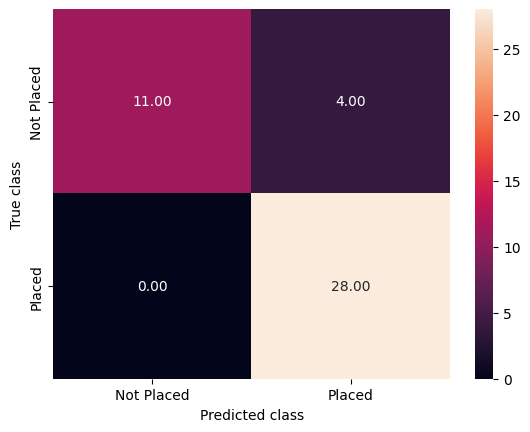

In [112]:
pred = log_reg_minmax.predict(X_test)
fig,axs = plt.subplots()
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt=".2f",ax=axs,xticklabels=["Not Placed","Placed"],yticklabels=["Not Placed","Placed"])
axs.set_xlabel("Predicted class")
axs.set_ylabel("True class")

We can see that the model has made only 4 errors among the 43 predictions. In these errors, the model predicted that the candidate is placed while he is not placed. This is a good performance, however it would be better to have a model that makes the other type of error, because it could cost the company a lot of money.

# Conclusion

The logistic regression with the minmax scaler and the default hyperparameters is the best model. It has a good performance with only 4 errors among the 43 predictions. We can use this model to predict if a candidate will be placed in the company or not.

**Improvements**

The lack of data explains the errors in the best models. So to improve this model, we should gather more data, especially for the `Not Placed` category.